In [1]:
import numpy
import scipy.special
import matplotlib.pyplot
import scipy.ndimage

In [2]:
import imageio
import glob

In [3]:
numpy.random.rand(3, 3) - 0.5

array([[ 0.0224365 ,  0.18086358, -0.4978992 ],
       [ 0.02533871, -0.07182396, -0.18563427],
       [-0.4601113 , -0.20601776, -0.0964986 ]])

神经网络

In [4]:
class neuralNetwork:
    
    def __init__(self, inputnodes, hiddennodes, outputnodes, learningrate):
        self.inodes = inputnodes
        self.hnodes = hiddennodes
        self.onedes = outputnodes
        
        self.lr = learningrate
        self.activation_function = lambda x: scipy.special.expit(x)
        
        # 简单方法初始化权重
        # self.wih = (numpy.random.rand(self.hnodes, self.inodes) - 0.5)
        # self.who = (numpy.random.rand(self.onedes, slef.hnodes) - 0.5)
        
        # 复杂方法初始化权重
        self.wih = numpy.random.normal(0.0, pow(self.hnodes, -0.5), (self.hnodes, self.inodes))
        self.who = numpy.random.normal(0.0, pow(self.onedes, -0.5), (self.onedes, self.hnodes))
        pass
    
    def train(self, inputs_list, targets_list):
        # 输出预测值
        inputs = numpy.array(inputs_list, ndmin=2).T
        targets = numpy.array(targets_list, ndmin=2).T
        
        hidden_inputs = numpy.dot(self.wih, inputs)
        hidden_outputs = self.activation_function(hidden_inputs)
        
        final_inputs = numpy.dot(self.who, hidden_outputs)
        final_outputs = self.activation_function(final_inputs)
        
        # 计算误差
        outputs_errors = targets - final_outputs
        hidden_errors = numpy.dot(self.who.T, outputs_errors)
        
        # 优化参数
        self.who += self.lr * numpy.dot((outputs_errors * final_outputs * (1.0 - final_outputs)), numpy.transpose(hidden_outputs))
        self.wih += self.lr * numpy.dot((hidden_errors * hidden_outputs * (1.0 - hidden_outputs)), numpy.transpose(inputs))
        
        pass
    
    def query(self, inputs_list):
        inputs = numpy.array(inputs_list, ndmin=2).T
        
        hidden_inputs = numpy.dot(self.wih, inputs)
        hidden_outputs = self.activation_function(hidden_inputs)
        
        final_inputs = numpy.dot(self.who, hidden_outputs)
        final_outputs = self.activation_function(final_inputs)
        return final_outputs
    

神经网络实例

In [5]:
input_nodes = 3
hidden_nodes = 3
output_nodes = 3

learning_rate = 0.5

n = neuralNetwork(input_nodes, hidden_nodes, output_nodes, learning_rate)

查询测试

In [6]:
n.query([1.0, 0.5, -1.5])

array([[0.77606054],
       [0.27934163],
       [0.67202835]])

打开自定义数据集

In [7]:
our_own_dataset = []

In [8]:
for image_file_name in glob.glob('my_own_images/2828_my_own_?.png'):
    print('loading...', image_file_name)
    label = int(image_file_name[-5:-4])
    img_array = imageio.imread(image_file_name, as_gray=True)
    img_data = 255.0 - img_array.reshape(784)
    img_data = (img_data / 255.0 * 0.99) + 0.01
    record = numpy.append(label, img_data)
    our_own_dataset.append(record)

loading... my_own_images/2828_my_own_3.png
loading... my_own_images/2828_my_own_2.png
loading... my_own_images/2828_my_own_5.png
loading... my_own_images/2828_my_own_4.png
loading... my_own_images/2828_my_own_6.png


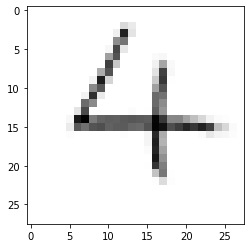

In [9]:
matplotlib.pyplot.imshow(our_own_dataset[3][1:].reshape(28,28),cmap='Greys', interpolation='None')

In [10]:
print(our_own_dataset[0])

[3.         0.01       0.01       0.01       0.01       0.01
 0.01       0.01       0.01       0.01       0.01       0.01
 0.01       0.01       0.01       0.01       0.01       0.01
 0.01       0.01       0.01       0.01       0.01       0.01
 0.01       0.01       0.01       0.01       0.01       0.01
 0.01       0.01       0.01       0.01       0.01       0.01
 0.01       0.01       0.01       0.01       0.01       0.01
 0.01       0.01       0.01       0.01       0.01       0.01
 0.01       0.01       0.01       0.01       0.01       0.01
 0.01       0.01       0.01       0.01       0.01       0.01
 0.01       0.01       0.01       0.01       0.01       0.01
 0.01       0.01       0.01       0.01       0.01       0.01
 0.01       0.01       0.01       0.01       0.01       0.01
 0.01       0.01       0.01       0.01       0.01       0.01
 0.01       0.01       0.01       0.01       0.01       0.01
 0.01       0.01       0.01       0.01       0.01       0.03329412
 0.12258823 0.01  

打开数据集

In [11]:
data_file = open('mnist_train_100.csv', 'r')
data_list = data_file.readlines()
data_file.close()

In [12]:
len(data_list)

100

In [13]:
data_list[0]

'5,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,3,18,18,18,126,136,175,26,166,255,247,127,0,0,0,0,0,0,0,0,0,0,0,0,30,36,94,154,170,253,253,253,253,253,225,172,253,242,195,64,0,0,0,0,0,0,0,0,0,0,0,49,238,253,253,253,253,253,253,253,253,251,93,82,82,56,39,0,0,0,0,0,0,0,0,0,0,0,0,18,219,253,253,253,253,253,198,182,247,241,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,80,156,107,253,253,205,11,0,43,154,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,14,1,154,253,90,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,139,253,190,2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,11,190,253,70,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,35,241,225,160,108,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,81,240,253,253,119,25,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,

图片展示

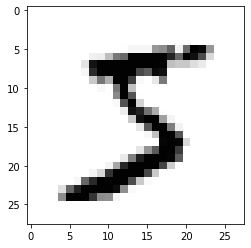

In [14]:
all_values = data_list[0].split(',')
image_array = numpy.asfarray(all_values[1:]).reshape((28, 28))
matplotlib.pyplot.imshow(image_array, cmap='Greys', interpolation='None')

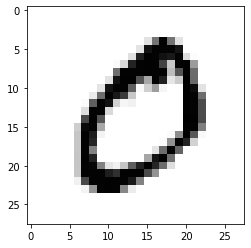

In [15]:
all_values = data_list[1].split(',')
image_arrary = numpy.asfarray(all_values[1:]).reshape((28, 28))
matplotlib.pyplot.imshow(image_arrary, cmap='Greys', interpolation='None')

颜色范围缩放到0.01 - 0.99

In [16]:
scaled_input = (numpy.asfarray(all_values[1:]) / 255.0 * 0.99) + 0.01
print(scaled_input)

[0.01       0.01       0.01       0.01       0.01       0.01
 0.01       0.01       0.01       0.01       0.01       0.01
 0.01       0.01       0.01       0.01       0.01       0.01
 0.01       0.01       0.01       0.01       0.01       0.01
 0.01       0.01       0.01       0.01       0.01       0.01
 0.01       0.01       0.01       0.01       0.01       0.01
 0.01       0.01       0.01       0.01       0.01       0.01
 0.01       0.01       0.01       0.01       0.01       0.01
 0.01       0.01       0.01       0.01       0.01       0.01
 0.01       0.01       0.01       0.01       0.01       0.01
 0.01       0.01       0.01       0.01       0.01       0.01
 0.01       0.01       0.01       0.01       0.01       0.01
 0.01       0.01       0.01       0.01       0.01       0.01
 0.01       0.01       0.01       0.01       0.01       0.01
 0.01       0.01       0.01       0.01       0.01       0.01
 0.01       0.01       0.01       0.01       0.01       0.01
 0.01       0.01       0

标签onehot

In [17]:
onodes = 10
targets = numpy.zeros(onodes) + 0.1
targets[int(all_values[0])] = 0.99
print(targets)

[0.99 0.1  0.1  0.1  0.1  0.1  0.1  0.1  0.1  0.1 ]


构建神经网络

In [18]:
input_nodes = 784
hidden_nodes = 100
output_nodes = 10
learning_rate = 0.3

n = neuralNetwork(input_nodes, hidden_nodes, output_nodes, learning_rate)

数据预处理并训练

In [19]:
training_data_file = open('mnist_train.csv', 'r')
# training_data_file = open('mnist_train_100.csv', 'r')
training_data_list = training_data_file.readlines()
training_data_file.close()

for record in training_data_list:
    all_values = record.split(',')
    inputs = (numpy.asfarray(all_values[1:]) / 255.0 * 0.9) + 0.01
    targets = numpy.zeros(output_nodes) + 0.01
    targets[int(all_values[0])] = 0.99
    n.train(inputs, targets)
    pass

测试效果

In [20]:
test_data_file = open('mnist_test.csv', 'r')
# test_data_file = open('mnist_test_10.csv', 'r')
test_data_list = test_data_file.readlines()
test_data_file.close()

In [21]:
all_values = test_data_list[0].split(',')
print(all_values[0])

7


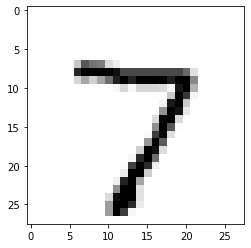

In [22]:
image_array = numpy.asfarray(all_values[1:]).reshape((28, 28))
matplotlib.pyplot.imshow(image_array, cmap='Greys', interpolation='None')

In [23]:
n.query((numpy.asfarray(all_values[1:]) / 255.0 * 0.99) + 0.01)

array([[0.00186921],
       [0.00435533],
       [0.01568598],
       [0.00423557],
       [0.00292591],
       [0.00154079],
       [0.00592691],
       [0.99144418],
       [0.00602979],
       [0.01598112]])

测试10个

In [24]:
scorecard = []

for record in test_data_list:
    all_values = record.split(',')
    correct_label = int(all_values[0])
    print(correct_label, 'Correct label')
    inputs = (numpy.asfarray(all_values[1:]) / 255.0 * 0.99) + 0.01
    outputs = n.query(inputs)
    label = numpy.argmax(outputs)
    print(label, 'network\'s answer')
    if (label == correct_label):
        scorecard.append(1)
    else:
        scorecard.append(0)
    pass

7 Correct label
7 network's answer
2 Correct label
2 network's answer
1 Correct label
1 network's answer
0 Correct label
0 network's answer
4 Correct label
4 network's answer
1 Correct label
1 network's answer
4 Correct label
4 network's answer
9 Correct label
9 network's answer
5 Correct label
5 network's answer
9 Correct label
9 network's answer
0 Correct label
0 network's answer
6 Correct label
6 network's answer
9 Correct label
9 network's answer
0 Correct label
0 network's answer
1 Correct label
1 network's answer
5 Correct label
5 network's answer
9 Correct label
9 network's answer
7 Correct label
7 network's answer
3 Correct label
3 network's answer
4 Correct label
4 network's answer
9 Correct label
9 network's answer
6 Correct label
6 network's answer
6 Correct label
6 network's answer
5 Correct label
5 network's answer
4 Correct label
4 network's answer
0 Correct label
0 network's answer
7 Correct label
7 network's answer
4 Correct label
4 network's answer
0 Correct label
0 ne

4 network's answer
1 Correct label
1 network's answer
8 Correct label
8 network's answer
2 Correct label
2 network's answer
1 Correct label
1 network's answer
2 Correct label
2 network's answer
9 Correct label
9 network's answer
7 Correct label
7 network's answer
5 Correct label
5 network's answer
9 Correct label
9 network's answer
2 Correct label
2 network's answer
6 Correct label
6 network's answer
4 Correct label
4 network's answer
1 Correct label
1 network's answer
5 Correct label
5 network's answer
8 Correct label
4 network's answer
2 Correct label
2 network's answer
9 Correct label
9 network's answer
2 Correct label
2 network's answer
0 Correct label
0 network's answer
4 Correct label
4 network's answer
0 Correct label
0 network's answer
0 Correct label
0 network's answer
2 Correct label
2 network's answer
8 Correct label
8 network's answer
4 Correct label
4 network's answer
7 Correct label
7 network's answer
1 Correct label
1 network's answer
2 Correct label
2 network's answer
4

3 network's answer
5 Correct label
5 network's answer
4 Correct label
4 network's answer
8 Correct label
8 network's answer
3 Correct label
3 network's answer
3 Correct label
3 network's answer
9 Correct label
9 network's answer
3 Correct label
3 network's answer
3 Correct label
3 network's answer
3 Correct label
8 network's answer
7 Correct label
7 network's answer
8 Correct label
8 network's answer
0 Correct label
0 network's answer
8 Correct label
2 network's answer
2 Correct label
2 network's answer
1 Correct label
1 network's answer
7 Correct label
7 network's answer
0 Correct label
0 network's answer
6 Correct label
6 network's answer
5 Correct label
5 network's answer
4 Correct label
4 network's answer
3 Correct label
3 network's answer
8 Correct label
3 network's answer
0 Correct label
0 network's answer
9 Correct label
9 network's answer
6 Correct label
6 network's answer
3 Correct label
3 network's answer
8 Correct label
8 network's answer
0 Correct label
0 network's answer
9

4 Correct label
4 network's answer
2 Correct label
2 network's answer
4 Correct label
4 network's answer
2 Correct label
2 network's answer
1 Correct label
1 network's answer
7 Correct label
7 network's answer
9 Correct label
9 network's answer
6 Correct label
6 network's answer
1 Correct label
1 network's answer
1 Correct label
1 network's answer
2 Correct label
2 network's answer
4 Correct label
4 network's answer
8 Correct label
8 network's answer
1 Correct label
1 network's answer
7 Correct label
7 network's answer
7 Correct label
7 network's answer
4 Correct label
4 network's answer
8 Correct label
7 network's answer
0 Correct label
0 network's answer
7 Correct label
7 network's answer
3 Correct label
3 network's answer
1 Correct label
1 network's answer
3 Correct label
3 network's answer
1 Correct label
1 network's answer
0 Correct label
0 network's answer
7 Correct label
7 network's answer
7 Correct label
7 network's answer
0 Correct label
0 network's answer
3 Correct label
3 ne

8 Correct label
8 network's answer
0 Correct label
0 network's answer
3 Correct label
3 network's answer
3 Correct label
3 network's answer
7 Correct label
7 network's answer
2 Correct label
2 network's answer
3 Correct label
3 network's answer
6 Correct label
6 network's answer
2 Correct label
2 network's answer
1 Correct label
1 network's answer
6 Correct label
6 network's answer
1 Correct label
1 network's answer
1 Correct label
1 network's answer
3 Correct label
3 network's answer
7 Correct label
7 network's answer
9 Correct label
9 network's answer
0 Correct label
0 network's answer
8 Correct label
8 network's answer
0 Correct label
0 network's answer
5 Correct label
5 network's answer
4 Correct label
4 network's answer
0 Correct label
0 network's answer
2 Correct label
2 network's answer
8 Correct label
8 network's answer
7 Correct label
2 network's answer
2 Correct label
2 network's answer
9 Correct label
9 network's answer
8 Correct label
8 network's answer
4 Correct label
4 ne

0 network's answer
2 Correct label
2 network's answer
3 Correct label
3 network's answer
7 Correct label
7 network's answer
5 Correct label
5 network's answer
7 Correct label
9 network's answer
8 Correct label
8 network's answer
8 Correct label
8 network's answer
5 Correct label
0 network's answer
0 Correct label
0 network's answer
1 Correct label
6 network's answer
1 Correct label
1 network's answer
4 Correct label
4 network's answer
8 Correct label
7 network's answer
3 Correct label
3 network's answer
9 Correct label
9 network's answer
0 Correct label
0 network's answer
0 Correct label
0 network's answer
0 Correct label
0 network's answer
6 Correct label
6 network's answer
6 Correct label
6 network's answer
2 Correct label
2 network's answer
3 Correct label
3 network's answer
7 Correct label
7 network's answer
8 Correct label
8 network's answer
4 Correct label
4 network's answer
7 Correct label
7 network's answer
7 Correct label
7 network's answer
9 Correct label
9 network's answer
2

2 network's answer
5 Correct label
5 network's answer
7 Correct label
7 network's answer
7 Correct label
7 network's answer
6 Correct label
6 network's answer
9 Correct label
3 network's answer
3 Correct label
3 network's answer
5 Correct label
5 network's answer
8 Correct label
8 network's answer
4 Correct label
4 network's answer
2 Correct label
2 network's answer
4 Correct label
4 network's answer
0 Correct label
0 network's answer
8 Correct label
8 network's answer
8 Correct label
8 network's answer
3 Correct label
3 network's answer
4 Correct label
9 network's answer
9 Correct label
9 network's answer
2 Correct label
2 network's answer
7 Correct label
7 network's answer
5 Correct label
5 network's answer
8 Correct label
8 network's answer
6 Correct label
9 network's answer
5 Correct label
3 network's answer
6 Correct label
6 network's answer
0 Correct label
0 network's answer
8 Correct label
8 network's answer
6 Correct label
6 network's answer
7 Correct label
7 network's answer
3

6 network's answer
7 Correct label
7 network's answer
2 Correct label
2 network's answer
7 Correct label
7 network's answer
8 Correct label
8 network's answer
8 Correct label
0 network's answer
1 Correct label
1 network's answer
9 Correct label
9 network's answer
7 Correct label
7 network's answer
1 Correct label
1 network's answer
1 Correct label
1 network's answer
7 Correct label
7 network's answer
5 Correct label
5 network's answer
3 Correct label
3 network's answer
3 Correct label
3 network's answer
5 Correct label
5 network's answer
1 Correct label
1 network's answer
3 Correct label
3 network's answer
7 Correct label
7 network's answer
6 Correct label
6 network's answer
1 Correct label
1 network's answer
3 Correct label
3 network's answer
8 Correct label
8 network's answer
7 Correct label
7 network's answer
5 Correct label
5 network's answer
9 Correct label
9 network's answer
9 Correct label
0 network's answer
0 Correct label
0 network's answer
0 Correct label
0 network's answer
2

9 network's answer
3 Correct label
3 network's answer
2 Correct label
2 network's answer
8 Correct label
8 network's answer
9 Correct label
9 network's answer
0 Correct label
0 network's answer
3 Correct label
3 network's answer
8 Correct label
8 network's answer
0 Correct label
0 network's answer
7 Correct label
9 network's answer
6 Correct label
6 network's answer
5 Correct label
5 network's answer
4 Correct label
4 network's answer
7 Correct label
7 network's answer
3 Correct label
3 network's answer
9 Correct label
0 network's answer
0 Correct label
0 network's answer
8 Correct label
8 network's answer
6 Correct label
6 network's answer
2 Correct label
2 network's answer
5 Correct label
5 network's answer
6 Correct label
1 network's answer
1 Correct label
1 network's answer
0 Correct label
0 network's answer
0 Correct label
0 network's answer
4 Correct label
4 network's answer
4 Correct label
4 network's answer
0 Correct label
0 network's answer
1 Correct label
1 network's answer
2

3 network's answer
0 Correct label
0 network's answer
4 Correct label
4 network's answer
6 Correct label
6 network's answer
1 Correct label
1 network's answer
0 Correct label
0 network's answer
2 Correct label
2 network's answer
5 Correct label
5 network's answer
8 Correct label
8 network's answer
4 Correct label
4 network's answer
4 Correct label
4 network's answer
1 Correct label
1 network's answer
1 Correct label
1 network's answer
5 Correct label
5 network's answer
4 Correct label
4 network's answer
6 Correct label
8 network's answer
6 Correct label
6 network's answer
0 Correct label
0 network's answer
6 Correct label
6 network's answer
9 Correct label
9 network's answer
2 Correct label
2 network's answer
6 Correct label
6 network's answer
2 Correct label
2 network's answer
7 Correct label
7 network's answer
1 Correct label
1 network's answer
7 Correct label
7 network's answer
9 Correct label
9 network's answer
4 Correct label
4 network's answer
0 Correct label
0 network's answer
0

5 network's answer
5 Correct label
5 network's answer
5 Correct label
5 network's answer
2 Correct label
2 network's answer
9 Correct label
9 network's answer
2 Correct label
2 network's answer
8 Correct label
8 network's answer
4 Correct label
4 network's answer
6 Correct label
6 network's answer
8 Correct label
8 network's answer
6 Correct label
6 network's answer
5 Correct label
5 network's answer
0 Correct label
0 network's answer
0 Correct label
0 network's answer
8 Correct label
8 network's answer
7 Correct label
7 network's answer
6 Correct label
6 network's answer
1 Correct label
1 network's answer
7 Correct label
7 network's answer
1 Correct label
1 network's answer
1 Correct label
1 network's answer
2 Correct label
2 network's answer
7 Correct label
7 network's answer
4 Correct label
4 network's answer
0 Correct label
0 network's answer
0 Correct label
0 network's answer
7 Correct label
7 network's answer
7 Correct label
7 network's answer
6 Correct label
6 network's answer
3

6 network's answer
6 Correct label
6 network's answer
5 Correct label
5 network's answer
7 Correct label
7 network's answer
4 Correct label
4 network's answer
7 Correct label
7 network's answer
5 Correct label
5 network's answer
9 Correct label
9 network's answer
5 Correct label
5 network's answer
8 Correct label
1 network's answer
4 Correct label
9 network's answer
9 Correct label
9 network's answer
9 Correct label
9 network's answer
1 Correct label
1 network's answer
6 Correct label
6 network's answer
5 Correct label
5 network's answer
0 Correct label
0 network's answer
1 Correct label
1 network's answer
3 Correct label
3 network's answer
7 Correct label
2 network's answer
0 Correct label
0 network's answer
3 Correct label
9 network's answer
4 Correct label
4 network's answer
8 Correct label
8 network's answer
2 Correct label
2 network's answer
2 Correct label
2 network's answer
0 Correct label
0 network's answer
2 Correct label
2 network's answer
5 Correct label
8 network's answer
1

9 network's answer
8 Correct label
8 network's answer
3 Correct label
3 network's answer
2 Correct label
2 network's answer
7 Correct label
7 network's answer
2 Correct label
2 network's answer
9 Correct label
9 network's answer
7 Correct label
7 network's answer
2 Correct label
2 network's answer
1 Correct label
1 network's answer
1 Correct label
1 network's answer
3 Correct label
3 network's answer
7 Correct label
7 network's answer
5 Correct label
5 network's answer
3 Correct label
3 network's answer
1 Correct label
1 network's answer
9 Correct label
9 network's answer
8 Correct label
8 network's answer
2 Correct label
2 network's answer
2 Correct label
2 network's answer
2 Correct label
2 network's answer
8 Correct label
8 network's answer
8 Correct label
8 network's answer
5 Correct label
5 network's answer
7 Correct label
7 network's answer
3 Correct label
3 network's answer
8 Correct label
8 network's answer
9 Correct label
9 network's answer
8 Correct label
8 network's answer
8

7 network's answer
4 Correct label
4 network's answer
2 Correct label
2 network's answer
0 Correct label
6 network's answer
8 Correct label
8 network's answer
9 Correct label
9 network's answer
9 Correct label
9 network's answer
4 Correct label
4 network's answer
2 Correct label
2 network's answer
4 Correct label
4 network's answer
6 Correct label
6 network's answer
7 Correct label
7 network's answer
8 Correct label
8 network's answer
7 Correct label
7 network's answer
6 Correct label
6 network's answer
9 Correct label
9 network's answer
4 Correct label
4 network's answer
1 Correct label
1 network's answer
3 Correct label
3 network's answer
7 Correct label
7 network's answer
3 Correct label
3 network's answer
0 Correct label
0 network's answer
8 Correct label
8 network's answer
8 Correct label
9 network's answer
7 Correct label
8 network's answer
6 Correct label
6 network's answer
9 Correct label
1 network's answer
3 Correct label
3 network's answer
9 Correct label
9 network's answer
2

2 network's answer
8 Correct label
8 network's answer
8 Correct label
8 network's answer
6 Correct label
6 network's answer
8 Correct label
8 network's answer
1 Correct label
1 network's answer
3 Correct label
3 network's answer
7 Correct label
7 network's answer
9 Correct label
9 network's answer
0 Correct label
0 network's answer
1 Correct label
1 network's answer
1 Correct label
1 network's answer
4 Correct label
9 network's answer
7 Correct label
7 network's answer
0 Correct label
0 network's answer
8 Correct label
8 network's answer
1 Correct label
1 network's answer
7 Correct label
7 network's answer
4 Correct label
4 network's answer
5 Correct label
5 network's answer
7 Correct label
7 network's answer
1 Correct label
1 network's answer
2 Correct label
2 network's answer
1 Correct label
1 network's answer
1 Correct label
1 network's answer
3 Correct label
3 network's answer
9 Correct label
0 network's answer
6 Correct label
6 network's answer
2 Correct label
4 network's answer
1

4 network's answer
5 Correct label
5 network's answer
6 Correct label
6 network's answer
7 Correct label
7 network's answer
8 Correct label
8 network's answer
5 Correct label
5 network's answer
4 Correct label
4 network's answer
8 Correct label
8 network's answer
7 Correct label
7 network's answer
4 Correct label
4 network's answer
7 Correct label
7 network's answer
7 Correct label
7 network's answer
3 Correct label
3 network's answer
9 Correct label
9 network's answer
8 Correct label
8 network's answer
8 Correct label
8 network's answer
3 Correct label
3 network's answer
1 Correct label
1 network's answer
5 Correct label
5 network's answer
8 Correct label
8 network's answer
2 Correct label
2 network's answer
7 Correct label
7 network's answer
4 Correct label
4 network's answer
2 Correct label
2 network's answer
1 Correct label
1 network's answer
5 Correct label
5 network's answer
4 Correct label
4 network's answer
5 Correct label
5 network's answer
5 Correct label
5 network's answer
8

5 network's answer
6 Correct label
6 network's answer
7 Correct label
9 network's answer
8 Correct label
4 network's answer
9 Correct label
9 network's answer
0 Correct label
0 network's answer
1 Correct label
1 network's answer
2 Correct label
2 network's answer
3 Correct label
3 network's answer
4 Correct label
4 network's answer
5 Correct label
5 network's answer
6 Correct label
6 network's answer
7 Correct label
7 network's answer
8 Correct label
8 network's answer
9 Correct label
9 network's answer
0 Correct label
0 network's answer
1 Correct label
1 network's answer
2 Correct label
2 network's answer
3 Correct label
3 network's answer
4 Correct label
4 network's answer
5 Correct label
5 network's answer
6 Correct label
6 network's answer
7 Correct label
7 network's answer
8 Correct label
8 network's answer
9 Correct label
9 network's answer
3 Correct label
3 network's answer
5 Correct label
5 network's answer
3 Correct label
3 network's answer
2 Correct label
2 network's answer
9

5 network's answer
0 Correct label
0 network's answer
6 Correct label
6 network's answer
8 Correct label
8 network's answer
9 Correct label
9 network's answer
4 Correct label
4 network's answer
1 Correct label
1 network's answer
9 Correct label
9 network's answer
5 Correct label
3 network's answer
3 Correct label
8 network's answer
0 Correct label
0 network's answer
4 Correct label
4 network's answer
8 Correct label
8 network's answer
9 Correct label
9 network's answer
1 Correct label
1 network's answer
4 Correct label
4 network's answer
0 Correct label
0 network's answer
5 Correct label
5 network's answer
5 Correct label
3 network's answer
2 Correct label
2 network's answer
1 Correct label
1 network's answer
5 Correct label
5 network's answer
4 Correct label
4 network's answer
0 Correct label
0 network's answer
7 Correct label
7 network's answer
6 Correct label
6 network's answer
0 Correct label
0 network's answer
1 Correct label
1 network's answer
7 Correct label
7 network's answer
0

3 network's answer
4 Correct label
4 network's answer
6 Correct label
6 network's answer
9 Correct label
9 network's answer
9 Correct label
9 network's answer
8 Correct label
8 network's answer
2 Correct label
2 network's answer
7 Correct label
7 network's answer
7 Correct label
7 network's answer
1 Correct label
1 network's answer
0 Correct label
0 network's answer
1 Correct label
1 network's answer
2 Correct label
2 network's answer
3 Correct label
3 network's answer
4 Correct label
4 network's answer
5 Correct label
5 network's answer
6 Correct label
6 network's answer
7 Correct label
7 network's answer
8 Correct label
8 network's answer
9 Correct label
9 network's answer
0 Correct label
0 network's answer
1 Correct label
1 network's answer
2 Correct label
2 network's answer
3 Correct label
3 network's answer
4 Correct label
4 network's answer
5 Correct label
5 network's answer
6 Correct label
6 network's answer
7 Correct label
7 network's answer
8 Correct label
8 network's answer
0

6 network's answer
3 Correct label
3 network's answer
4 Correct label
4 network's answer
4 Correct label
4 network's answer
2 Correct label
2 network's answer
8 Correct label
9 network's answer
1 Correct label
1 network's answer
0 Correct label
0 network's answer
6 Correct label
2 network's answer
4 Correct label
4 network's answer
9 Correct label
9 network's answer
7 Correct label
7 network's answer
2 Correct label
2 network's answer
3 Correct label
3 network's answer
3 Correct label
3 network's answer
9 Correct label
9 network's answer
2 Correct label
2 network's answer
0 Correct label
0 network's answer
9 Correct label
9 network's answer
3 Correct label
3 network's answer
3 Correct label
3 network's answer
9 Correct label
7 network's answer
1 Correct label
1 network's answer
5 Correct label
5 network's answer
2 Correct label
2 network's answer
3 Correct label
3 network's answer
7 Correct label
7 network's answer
7 Correct label
7 network's answer
8 Correct label
8 network's answer
4

9 network's answer
8 Correct label
8 network's answer
4 Correct label
4 network's answer
1 Correct label
1 network's answer
0 Correct label
0 network's answer
6 Correct label
6 network's answer
0 Correct label
0 network's answer
9 Correct label
9 network's answer
6 Correct label
6 network's answer
8 Correct label
8 network's answer
8 Correct label
8 network's answer
5 Correct label
5 network's answer
6 Correct label
6 network's answer
1 Correct label
1 network's answer
1 Correct label
1 network's answer
9 Correct label
9 network's answer
8 Correct label
8 network's answer
9 Correct label
9 network's answer
2 Correct label
2 network's answer
3 Correct label
3 network's answer
5 Correct label
5 network's answer
5 Correct label
5 network's answer
9 Correct label
9 network's answer
4 Correct label
4 network's answer
2 Correct label
2 network's answer
1 Correct label
1 network's answer
9 Correct label
9 network's answer
4 Correct label
4 network's answer
9 Correct label
9 network's answer
1

2 network's answer
7 Correct label
7 network's answer
7 Correct label
7 network's answer
0 Correct label
0 network's answer
1 Correct label
1 network's answer
2 Correct label
2 network's answer
3 Correct label
3 network's answer
4 Correct label
4 network's answer
5 Correct label
5 network's answer
6 Correct label
6 network's answer
7 Correct label
7 network's answer
8 Correct label
8 network's answer
9 Correct label
9 network's answer
0 Correct label
0 network's answer
1 Correct label
1 network's answer
2 Correct label
2 network's answer
3 Correct label
3 network's answer
4 Correct label
4 network's answer
5 Correct label
5 network's answer
6 Correct label
6 network's answer
7 Correct label
7 network's answer
8 Correct label
8 network's answer
9 Correct label
9 network's answer
0 Correct label
0 network's answer
1 Correct label
1 network's answer
2 Correct label
2 network's answer
3 Correct label
3 network's answer
4 Correct label
4 network's answer
5 Correct label
5 network's answer
6

5 network's answer
3 Correct label
3 network's answer
7 Correct label
7 network's answer
0 Correct label
0 network's answer
7 Correct label
7 network's answer
7 Correct label
7 network's answer
5 Correct label
5 network's answer
7 Correct label
7 network's answer
9 Correct label
9 network's answer
9 Correct label
9 network's answer
4 Correct label
4 network's answer
7 Correct label
7 network's answer
0 Correct label
0 network's answer
3 Correct label
3 network's answer
4 Correct label
4 network's answer
1 Correct label
1 network's answer
5 Correct label
5 network's answer
8 Correct label
8 network's answer
1 Correct label
1 network's answer
4 Correct label
4 network's answer
8 Correct label
8 network's answer
4 Correct label
4 network's answer
1 Correct label
1 network's answer
8 Correct label
8 network's answer
6 Correct label
6 network's answer
6 Correct label
6 network's answer
4 Correct label
4 network's answer
6 Correct label
6 network's answer
0 Correct label
0 network's answer
5

8 network's answer
9 Correct label
9 network's answer
0 Correct label
0 network's answer
1 Correct label
1 network's answer
2 Correct label
2 network's answer
3 Correct label
3 network's answer
4 Correct label
4 network's answer
5 Correct label
5 network's answer
6 Correct label
6 network's answer
7 Correct label
7 network's answer
8 Correct label
8 network's answer
9 Correct label
9 network's answer
0 Correct label
0 network's answer
1 Correct label
1 network's answer
2 Correct label
2 network's answer
3 Correct label
3 network's answer
4 Correct label
4 network's answer
5 Correct label
5 network's answer
6 Correct label
6 network's answer
7 Correct label
7 network's answer
8 Correct label
8 network's answer
9 Correct label
9 network's answer
8 Correct label
8 network's answer
9 Correct label
9 network's answer
5 Correct label
5 network's answer
7 Correct label
7 network's answer
0 Correct label
0 network's answer
3 Correct label
3 network's answer
1 Correct label
1 network's answer
6

9 Correct label
9 network's answer
2 Correct label
2 network's answer
1 Correct label
1 network's answer
0 Correct label
0 network's answer
6 Correct label
6 network's answer
5 Correct label
5 network's answer
3 Correct label
3 network's answer
4 Correct label
4 network's answer
8 Correct label
8 network's answer
5 Correct label
5 network's answer
9 Correct label
9 network's answer
6 Correct label
6 network's answer
9 Correct label
9 network's answer
0 Correct label
0 network's answer
6 Correct label
6 network's answer
3 Correct label
3 network's answer
0 Correct label
0 network's answer
8 Correct label
6 network's answer
1 Correct label
1 network's answer
6 Correct label
6 network's answer
0 Correct label
0 network's answer
0 Correct label
0 network's answer
1 Correct label
1 network's answer
2 Correct label
2 network's answer
3 Correct label
3 network's answer
4 Correct label
4 network's answer
5 Correct label
5 network's answer
6 Correct label
6 network's answer
7 Correct label
7 ne

7 network's answer
5 Correct label
5 network's answer
5 Correct label
5 network's answer
7 Correct label
7 network's answer
3 Correct label
3 network's answer
5 Correct label
5 network's answer
0 Correct label
0 network's answer
1 Correct label
1 network's answer
1 Correct label
1 network's answer
3 Correct label
3 network's answer
8 Correct label
8 network's answer
4 Correct label
4 network's answer
9 Correct label
9 network's answer
4 Correct label
4 network's answer
5 Correct label
5 network's answer
1 Correct label
1 network's answer
8 Correct label
8 network's answer
6 Correct label
6 network's answer
8 Correct label
8 network's answer
9 Correct label
9 network's answer
0 Correct label
0 network's answer
1 Correct label
1 network's answer
2 Correct label
2 network's answer
3 Correct label
3 network's answer
4 Correct label
4 network's answer
5 Correct label
5 network's answer
6 Correct label
6 network's answer
7 Correct label
7 network's answer
8 Correct label
8 network's answer
9

7 network's answer
8 Correct label
8 network's answer
1 Correct label
1 network's answer
5 Correct label
5 network's answer
1 Correct label
1 network's answer
4 Correct label
4 network's answer
6 Correct label
6 network's answer
0 Correct label
0 network's answer
0 Correct label
0 network's answer
4 Correct label
4 network's answer
9 Correct label
9 network's answer
1 Correct label
1 network's answer
6 Correct label
6 network's answer
6 Correct label
6 network's answer
9 Correct label
9 network's answer
0 Correct label
0 network's answer
7 Correct label
7 network's answer
6 Correct label
6 network's answer
1 Correct label
1 network's answer
1 Correct label
1 network's answer
0 Correct label
0 network's answer
1 Correct label
1 network's answer
2 Correct label
2 network's answer
3 Correct label
3 network's answer
4 Correct label
4 network's answer
7 Correct label
2 network's answer
2 Correct label
2 network's answer
3 Correct label
3 network's answer
4 Correct label
4 network's answer
5

4 network's answer
5 Correct label
5 network's answer
6 Correct label
6 network's answer
7 Correct label
7 network's answer
8 Correct label
8 network's answer
9 Correct label
9 network's answer
0 Correct label
0 network's answer
1 Correct label
1 network's answer
2 Correct label
2 network's answer
3 Correct label
3 network's answer
4 Correct label
4 network's answer
5 Correct label
5 network's answer
6 Correct label
6 network's answer
7 Correct label
7 network's answer
8 Correct label
8 network's answer
9 Correct label
9 network's answer
0 Correct label
0 network's answer
1 Correct label
1 network's answer
2 Correct label
2 network's answer
3 Correct label
3 network's answer
5 Correct label
5 network's answer
6 Correct label
6 network's answer
7 Correct label
7 network's answer
8 Correct label
8 network's answer
1 Correct label
1 network's answer
0 Correct label
0 network's answer
9 Correct label
9 network's answer
5 Correct label
5 network's answer
7 Correct label
7 network's answer
5

8 network's answer
1 Correct label
1 network's answer
4 Correct label
4 network's answer
7 Correct label
7 network's answer
5 Correct label
5 network's answer
2 Correct label
2 network's answer
0 Correct label
0 network's answer
0 Correct label
0 network's answer
1 Correct label
1 network's answer
7 Correct label
7 network's answer
8 Correct label
8 network's answer
9 Correct label
7 network's answer
6 Correct label
6 network's answer
8 Correct label
8 network's answer
8 Correct label
8 network's answer
2 Correct label
2 network's answer
3 Correct label
3 network's answer
6 Correct label
6 network's answer
1 Correct label
1 network's answer
2 Correct label
2 network's answer
9 Correct label
9 network's answer
5 Correct label
5 network's answer
2 Correct label
2 network's answer
0 Correct label
0 network's answer
1 Correct label
1 network's answer
2 Correct label
2 network's answer
3 Correct label
3 network's answer
4 Correct label
4 network's answer
5 Correct label
5 network's answer
6

In [25]:
print(scorecard)

[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 

准确率

In [26]:
scorecard_array = numpy.asarray(scorecard)
print('performance = ', scorecard_array.sum() / scorecard_array.size)

performance =  0.9491


改进

In [27]:
def run_train():
    for record in training_data_list:
        all_values = record.split(',')
        inputs = (numpy.asfarray(all_values[1:]) / 255.0 * 0.9) + 0.01
        targets = numpy.zeros(output_nodes) + 0.01
        targets[int(all_values[0])] = 0.99
        n.train(inputs, targets)
    pass

In [28]:
def run_test():
    scorecard = []

    for record in test_data_list:
        all_values = record.split(',')
        correct_label = int(all_values[0])
        inputs = (numpy.asfarray(all_values[1:]) / 255.0 * 0.99) + 0.01
        outputs = n.query(inputs)
        label = numpy.argmax(outputs)
        if (label == correct_label):
            scorecard.append(1)
        else:
            scorecard.append(0)
        pass
    
    scorecard_array = numpy.asarray(scorecard)
    print('performance = ', scorecard_array.sum() / scorecard_array.size)

1. 调整学习率。对于这个数据集0.1-0.3之间较好。

In [29]:
input_nodes = 784
hidden_nodes = 100
output_nodes = 10
learning_rate = 0.2

n = neuralNetwork(input_nodes, hidden_nodes, output_nodes, learning_rate)
run_train()
run_test()

performance =  0.9529


2. 多次训练，增加训练轮次。

In [30]:
epochs = 2
for e in range(epochs):
    run_train()
run_test()

performance =  0.961


3. 改变网络的形状

In [31]:
input_nodes = 784
hidden_nodes = 300
output_nodes = 10
learning_rate = 0.2

n = neuralNetwork(input_nodes, hidden_nodes, output_nodes, learning_rate)
run_train()
run_test()

performance =  0.9584


4. 图像旋转

In [32]:
input_nodes = 784
hidden_nodes = 100
output_nodes = 10
learning_rate = 0.3

n = neuralNetwork(input_nodes, hidden_nodes, output_nodes, learning_rate)
for record in training_data_list:
    all_values = record.split(',')
    inputs = (numpy.asfarray(all_values[1:]) / 255.0 * 0.99) + 0.01
    targets = numpy.zeros(output_nodes) + 0.01
    targets[int(all_values[0])] = 0.99
    n.train(inputs, targets)
    
    inputs_plusx_img = scipy.ndimage.interpolation.rotate(inputs.reshape(28, 28), 10, cval=0.01, order=1, reshape=False)
    n.train(inputs_plusx_img.reshape(784), targets)
    
    inputs_minusx_img = scipy.ndimage.interpolation.rotate(inputs.reshape(28, 28), -10, cval=0.01, order=1, reshape=False)
    n.train(inputs_minusx_img.reshape(784), targets)
run_test()

performance =  0.9387


反查询，输入目标值，查看输入层图像的特征

In [33]:
class neuralNetwork:
    
    def __init__(self, inputnodes, hiddennodes, outputnodes, learningrate):
        self.inodes = inputnodes
        self.hnodes = hiddennodes
        self.onedes = outputnodes
        
        self.lr = learningrate
        self.activation_function = lambda x: scipy.special.expit(x)
        # 反查询，sigmod反函数
        self.inverse_activation_function = lambda x: scipy.special.logit(x)
        
        # 简单方法初始化权重
        # self.wih = (numpy.random.rand(self.hnodes, self.inodes) - 0.5)
        # self.who = (numpy.random.rand(self.onedes, slef.hnodes) - 0.5)
        
        # 复杂方法初始化权重
        self.wih = numpy.random.normal(0.0, pow(self.hnodes, -0.5), (self.hnodes, self.inodes))
        self.who = numpy.random.normal(0.0, pow(self.onedes, -0.5), (self.onedes, self.hnodes))
        pass
    
    def train(self, inputs_list, targets_list):
        # 输出预测值
        inputs = numpy.array(inputs_list, ndmin=2).T
        targets = numpy.array(targets_list, ndmin=2).T
        
        hidden_inputs = numpy.dot(self.wih, inputs)
        hidden_outputs = self.activation_function(hidden_inputs)
        
        final_inputs = numpy.dot(self.who, hidden_outputs)
        final_outputs = self.activation_function(final_inputs)
        
        # 计算误差
        outputs_errors = targets - final_outputs
        hidden_errors = numpy.dot(self.who.T, outputs_errors)
        
        # 优化参数
        self.who += self.lr * numpy.dot((outputs_errors * final_outputs * (1.0 - final_outputs)), numpy.transpose(hidden_outputs))
        self.wih += self.lr * numpy.dot((hidden_errors * hidden_outputs * (1.0 - hidden_outputs)), numpy.transpose(inputs))
        
        pass
    
    def query(self, inputs_list):
        inputs = numpy.array(inputs_list, ndmin=2).T
        
        hidden_inputs = numpy.dot(self.wih, inputs)
        hidden_outputs = self.activation_function(hidden_inputs)
        
        final_inputs = numpy.dot(self.who, hidden_outputs)
        final_outputs = self.activation_function(final_inputs)
        return final_outputs
    
    def backquery(self, targets_list):
        final_outputs = numpy.array(targets_list, ndmin=2).T
        
        final_inputs = self.inverse_activation_function(final_outputs)
        
        hidden_outputs = numpy.dot(self.who.T, final_inputs)
        hidden_outputs -= numpy.min(hidden_outputs)
        hidden_outputs /= numpy.max(hidden_outputs)
        hidden_outputs *= 0.98
        hidden_outputs += 0.01
        
        hidden_inputs = self.inverse_activation_function(hidden_outputs)
        
        inputs = numpy.dot(self.wih.T, hidden_inputs)
        inputs -= numpy.min(inputs)
        inputs /= numpy.max(inputs)
        inputs *= 0.98
        inputs += 0.01
        
        return inputs

In [34]:
input_nodes = 784
hidden_nodes = 100
output_nodes = 10
learning_rate = 0.3

n = neuralNetwork(input_nodes, hidden_nodes, output_nodes, learning_rate)
run_train()
run_test()

performance =  0.9435


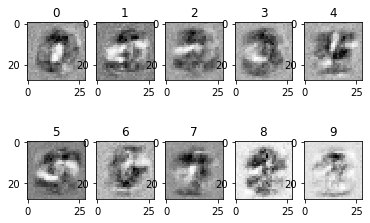

In [35]:
for label in range(10):
    targets = numpy.zeros(output_nodes) + 0.01
    targets[label] = 0.99
    image_data = n.backquery(targets)
    matplotlib.pyplot.subplot(2, 5, label+1)
    matplotlib.pyplot.imshow(image_data.reshape(28, 28), cmap='Greys', interpolation='None')
    matplotlib.pyplot.title(label)